In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBRFRegressor
# The library we need to build the model

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
# These are the library we need for model evalulation

import joblib
from sklearn.pipeline import Pipeline
# Library to export and build the model

%matplotlib inline

In [4]:
df=pd.read_csv('/home/yash/media/kaggle_data/Nuclear data.csv')
df
#Imported the dataset which contained the data point 

,Energy Theo,Energy Expt,Log ft theo,Log ft expt
0,1306,1636,4.309,5.07
1,2606,4266,4.997,5.80
2,0,247,3.921,4.25
3,2452,2497,5.173,5.30
4,1285,1495,5.731,5.70
...,...,...,...,...
68,3105,3020,6.788,5.50
69,617,686,3.746,5.60
70,844,965,4.202,5.20
71,1487,1504,5.444,5.60


Text(0, 0.5, 'Theoretical Energy')

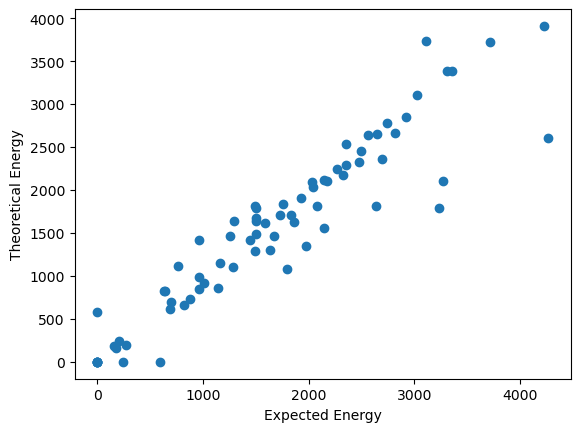

In [7]:
plt.scatter(df['Energy Expt'],df['Energy Theo'])
plt.xlabel('Expected Energy')
plt.ylabel('Theoretical Energy')
#This is the scatter plot of the data point that we have to work with

Text(0, 0.5, 'Theoretical Energy')

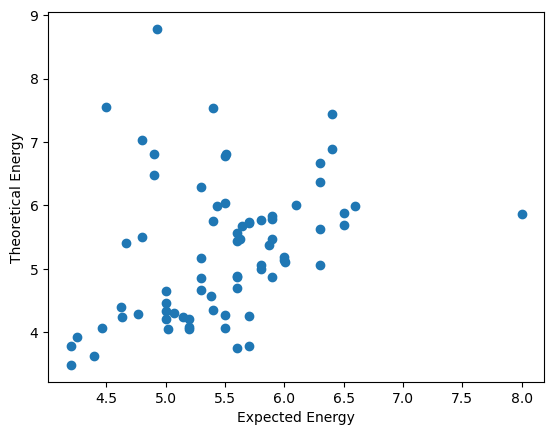

In [8]:
plt.scatter(df['Log ft expt'],df['Log ft theo'])
plt.xlabel('Expected Energy')
plt.ylabel('Theoretical Energy')
#This is the scatter plot of the data point that we have to work with

In [9]:
lin=LinearRegression()
lin_log_ft=LinearRegression()

In [10]:
lin.fit(df[['Energy Expt']],df[['Energy Theo']])

LinearRegression()

In [11]:
slope_energy=lin.coef_#slope of the best fit line 

intercep_energy=lin.intercept_#y intercept of the best fit line 

Text(0, 0.5, 'Theoretical Energy')

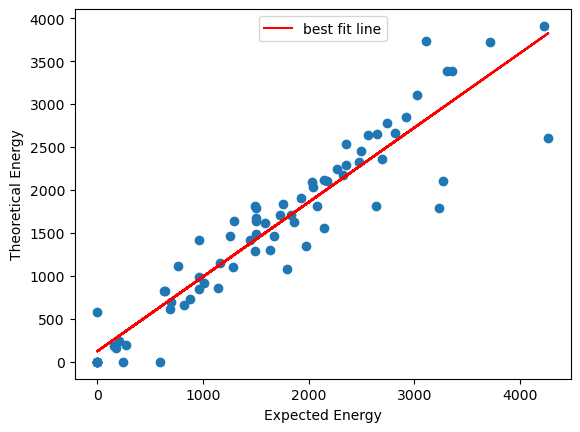

In [12]:
plt.scatter(df['Energy Expt'],df['Energy Theo'])
plt.rcParams["figure.autolayout"] = True

plt.plot(df['Energy Expt'],lin.predict(df[['Energy Expt']]),color='red',label='best fit line')
#Ploting the best fit line for the energy value

leg = plt.legend(loc='upper center')
plt.xlabel('Expected Energy')
plt.ylabel('Theoretical Energy')
#print the legend of the graph

In [13]:
print('slope:{} y intercept:{}'.format(slope_energy,intercep_energy))

slope:[[0.86748487]] y intercept:[124.14519704]


## Things left to do
### 1) Average error in the slope 
### 2) Putting in the log ft value 
### 3) Calculating the R(GT) value 

In [14]:
lin_log_ft.fit(df[['Log ft expt']],df[['Log ft theo']])

LinearRegression()

Text(0, 0.5, 'Theoretical Energy')

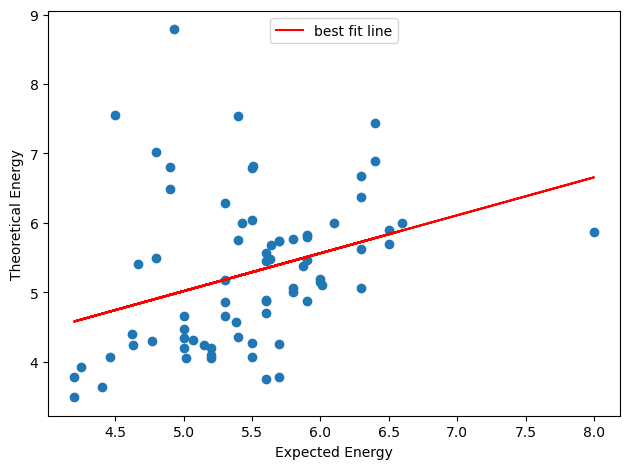

In [15]:
plt.scatter(df['Log ft expt'],df['Log ft theo'])
plt.rcParams["figure.autolayout"] = True

plt.plot(df['Log ft expt'],lin_log_ft.predict(df[['Log ft expt']]),color='red',label='best fit line')
#Ploting the best fit line for the energy value

leg = plt.legend(loc='upper center')
plt.xlabel('Expected Energy')
plt.ylabel('Theoretical Energy')
#print the legend of the graph

In [16]:
df_test=pd.read_csv('/home/yash/media/yash//kaggle_data/Nuclear data_test.csv')
df_test

,RGT Expt,RGT Theo
0,0.536584,0.519625
1,0.034761,0.599895
2,0.086315,0.095568
3,0.092489,0.110448
4,0.041313,0.068579
...,...,...
83,0.037206,0.025097
84,0.005504,0.017145
85,0.002357,0.003741
86,0.007160,0.007599


Text(0, 0.5, 'Theoretical Energy')

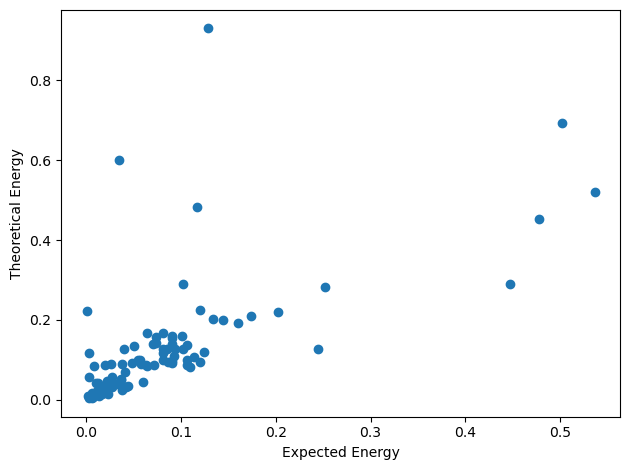

In [17]:
plt.scatter(df_test['RGT Expt'],df_test['RGT Theo'])
plt.xlabel('Expected Energy')
plt.ylabel('Theoretical Energy')
#slope =0.069+-0.020
#This is the scatter plot of the data point that we have to work with

In [18]:
Linear_regression_RGT=LinearRegression()

In [19]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(df_test[['RGT Theo']],df_test[['RGT Expt']],test_size=0.40)

In [20]:
Linear_regression_RGT.fit(Xtrain,Ytrain)

LinearRegression()

In [21]:
slope_model=Linear_regression_RGT.coef_
slope_model

array([[0.34148234]])

In [22]:
intercept_model=Linear_regression_RGT.intercept_
intercept_model

array([0.04492943])

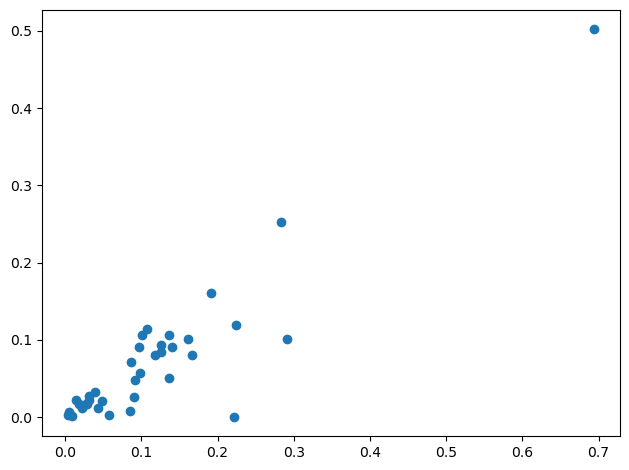

In [23]:
plt.scatter(Xtest,Ytest)

In [24]:
Y_pred=Linear_regression_RGT.predict(df_test[['RGT Theo']])

In [25]:
df_test.columns

Index(['RGT Expt', 'RGT Theo'], dtype='object')

Text(0, 0.5, 'Theoretical Energy')

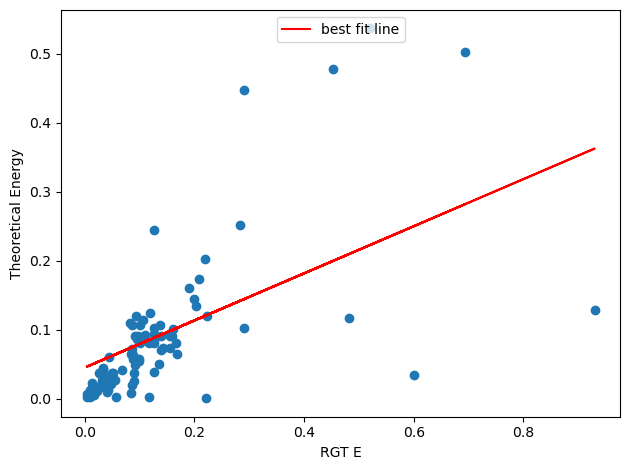

In [26]:
plt.scatter(df_test['RGT Theo'],df_test['RGT Expt'])
plt.rcParams["figure.autolayout"] = True

plt.plot(df_test[['RGT Theo']],Linear_regression_RGT.predict(df_test[['RGT Theo']]),color='red',label='best fit line')
#Ploting the best fit line for the energy value

leg = plt.legend(loc='upper center')
plt.xlabel('RGT E')
plt.ylabel('Theoretical Energy')
#print the legend of the graph

In [27]:
def function_slope():
    slope=0
    slope_cal_not_done=True
    while(slope_cal_not_done):
        Xtrain,Xtest,Ytrain,Ytest = train_test_split(df_test[['RGT Theo']],df_test[['RGT Expt']],test_size=0.40)
        Linear_regression_RGT.fit(Xtrain,Ytrain)
        slope=Linear_regression_RGT.coef_
        slope
        print (slope)
        if((slope>0.66) and(slope<0.67)):
            slope_cal_not_done=False
    
    return(slope)

In [28]:
slope_RGT=function_slope()

[[0.83162027]]
[[0.47832167]]
[[0.26513112]]
[[0.31928365]]
[[0.40728886]]
[[0.49364474]]
[[0.4918599]]
[[0.76865877]]
[[0.28229816]]
[[0.33700805]]
[[0.67929947]]
[[0.53787459]]
[[0.62415238]]
[[0.37352216]]
[[0.51171501]]
[[0.31232674]]
[[0.25592096]]
[[0.31083976]]
[[0.28927253]]
[[0.36777868]]
[[0.34032299]]
[[0.83830967]]
[[0.4211993]]
[[0.2940983]]
[[0.37096197]]
[[0.30438261]]
[[0.58554923]]
[[0.8031222]]
[[0.39379331]]
[[0.18358444]]
[[0.62799994]]
[[0.56969725]]
[[0.39973214]]
[[0.50461647]]
[[0.42677287]]
[[0.56569147]]
[[0.37999914]]
[[0.36555928]]
[[0.44078087]]
[[0.34679988]]
[[0.2898236]]
[[0.35950326]]
[[0.48901335]]
[[0.33608081]]
[[0.61273279]]
[[0.39150694]]
[[0.35649532]]
[[0.6717819]]
[[0.34695933]]
[[0.32713738]]
[[0.28195268]]
[[0.26709211]]
[[0.56483849]]
[[0.25355484]]
[[0.33225963]]
[[0.58424136]]
[[0.38982558]]
[[0.48179755]]
[[0.41039342]]
[[0.45637443]]
[[0.39152874]]
[[0.40241317]]
[[0.31594557]]
[[0.83207889]]
[[0.14795216]]
[[0.53640318]]
[[0.41759895]]
[

Text(0, 0.5, 'RGT Expterimental')

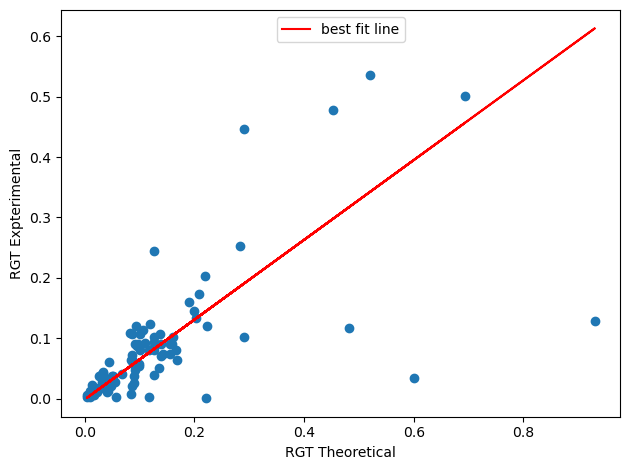

In [29]:
plt.scatter(df_test['RGT Theo'],df_test['RGT Expt'])
plt.rcParams["figure.autolayout"] = True

plt.plot(df_test['RGT Theo'],Linear_regression_RGT.predict(df_test[['RGT Theo']]),color='red',label='best fit line')
#Ploting the best fit line for the energy value

leg = plt.legend(loc='upper center')
plt.xlabel('RGT Theoretical')
plt.ylabel('RGT Expterimental')
#print the legend of the graph

joblib.dump(Linear_regression_RGT,"Linear_Regression_RGT_slope_0.665.joblib")

In [30]:
Nuclear_half_live =pd.read_csv('/home/yash/media/yash//kaggle_data/Nuclear half life.csv')

In [31]:
Nuclear_half_live

,Half life theo,Half life expt,mass number,Name_element,B_GT
0,251.90,460.0,52,SC,0.1004
1,268.87,461.0,53,SC,0.1400
2,186.70,86.0,54,SC,0.8950
3,18.51,22.0,55,SC,0.0902
4,1.56,11.0,56,SC,0.7990
...,...,...,...,...,...
74,393.00,570.0,76,Ga,0.2640
75,110.00,208.0,77,Ga,0.0680
76,51.00,147.0,78,Ga,0.2670
77,450.88,995.0,79,Ga,0.0560


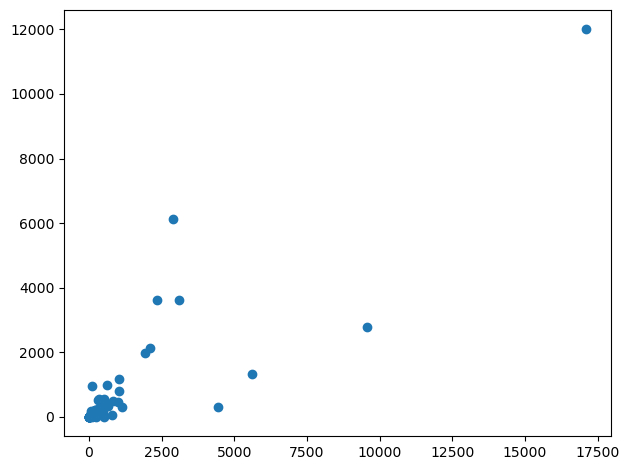

In [32]:
plt.scatter(Nuclear_half_live['Half life expt'],Nuclear_half_live['Half life theo'])

In [33]:
y_pred=Linear_regression_RGT.predict(df_test[['RGT Theo']])

In [34]:
MeanSquaredError=mean_squared_error(df_test[['RGT Expt']],y_pred)

In [35]:
MeanSquaredError

0.007421414734648743

In [36]:
dummy=pd.get_dummies(Nuclear_half_live["Name_element"])
dummy

,Co,Cr,Cu,Fe,Ga,Mn,Ni,SC,Ti,V,Zn
0,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
74,False,False,False,False,True,False,False,False,False,False,False
75,False,False,False,False,True,False,False,False,False,False,False
76,False,False,False,False,True,False,False,False,False,False,False
77,False,False,False,False,True,False,False,False,False,False,False


In [37]:
dummy.replace(False,'0',inplace=True)
dummy.replace(True,'1',inplace=True)

In [38]:
dummy

,Co,Cr,Cu,Fe,Ga,Mn,Ni,SC,Ti,V,Zn
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
74,0,0,0,0,1,0,0,0,0,0,0
75,0,0,0,0,1,0,0,0,0,0,0
76,0,0,0,0,1,0,0,0,0,0,0
77,0,0,0,0,1,0,0,0,0,0,0


In [39]:
Nuclear_half_live=pd.concat([Nuclear_half_live,dummy],axis=1)

In [40]:
Nuclear_half_live.drop(['Name_element'],axis='columns',inplace=True)

In [41]:
Nuclear_half_live

,Half life theo,Half life expt,mass number,B_GT,Co,Cr,Cu,Fe,Ga,Mn,Ni,SC,Ti,V,Zn
0,251.90,460.0,52,0.1004,0,0,0,0,0,0,0,1,0,0,0
1,268.87,461.0,53,0.1400,0,0,0,0,0,0,0,1,0,0,0
2,186.70,86.0,54,0.8950,0,0,0,0,0,0,0,1,0,0,0
3,18.51,22.0,55,0.0902,0,0,0,0,0,0,0,1,0,0,0
4,1.56,11.0,56,0.7990,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,393.00,570.0,76,0.2640,0,0,0,0,1,0,0,0,0,0,0
75,110.00,208.0,77,0.0680,0,0,0,0,1,0,0,0,0,0,0
76,51.00,147.0,78,0.2670,0,0,0,0,1,0,0,0,0,0,0
77,450.88,995.0,79,0.0560,0,0,0,0,1,0,0,0,0,0,0


In [42]:
import tensorflow as tf
from tensorflow import keras

2023-10-09 09:59:12.400191: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-09 09:59:13.530100: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [43]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2023-10-09 09:59:14.473443: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-09 09:59:14.724478: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-09 09:59:14.724715: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [44]:
mse=keras.losses.MeanSquaredError()
optimzer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

In [45]:
Nuclear_train_x,Nuclear_test_x,Nuclear_train_y,Nuclear_test_y=train_test_split(Nuclear_half_live[['mass number','B_GT']],Nuclear_half_live['Half life expt'],test_size=0.2)

In [46]:
Nuclear_train_x[:5]

,mass number,B_GT
9,56,0.4890
35,64,1.4470
2,54,0.8950
0,52,0.1004
59,68,0.0770


In [47]:
xg_model=XGBRFRegressor(n_estimators=1000,num_parallel_tree=10)

Nuclear_train_x,Nuclear_train_y=Scaler_max.fit_transform([[Nuclear_train_x]])
Nuclear_train_x.reshape(-1,63,)
Nuclear_train_y.reshape(-1,63,)

In [48]:
xg_model.fit(Nuclear_train_x,Nuclear_train_y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=1000, n_jobs=None, num_parallel_tree=10,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [49]:
Scaler_max=MinMaxScaler()

new_dataframe=pd.concat([Nuclear_half_live,df_test],axis=1)
new_dataframem

mean_absolute_error_done=True
mean_absolute_error_value=1000
i=0
error=0
min_error=1000000
while mean_absolute_error_done:
    if (mean_absolute_error_value>100):
        Nuclear_train_x,Nuclear_test_x,Nuclear_train_y,Nuclear_test_y=train_test_split(Nuclear_half_live['mass number'],Nuclear_half_live['Half life expt'],test_size=0.2)
        xg_model.fit(Nuclear_train_x,Nuclear_train_y)
        predictions = xg_model.predict(Nuclear_test_x)
        error=mean_absolute_error(predictions, Nuclear_test_y)
        print("Mean Absolute Error : " + str(error))
        if(error<min_error):
            min_error=error
        i+=1
    else:
        mean_absolute_error_done=False
    if(i==10000):
        break
    elif(i%100==0):
        print(i)
        
print("The minimum error is "+str(min_error))

In [50]:
Nuclear_train_x,Nuclear_test_x,Nuclear_train_y,Nuclear_test_y=train_test_split(Nuclear_half_live[['mass number','B_GT']],Nuclear_half_live['Half life expt'],test_size=0.2)

Nuclear_train_x=Nuclear_train_x.to_numpy()
Nuclear_train_y=Nuclear_train_y.to_numpy()
Nuclear_train_x.reshape(63,1)
Nuclear_train_y.reshape(63,1)

In [51]:
Nuclear_train_y.shape

(63,)

In [52]:
Tensor_array_tx=tf.convert_to_tensor(Nuclear_train_x)
Tensor_array_ty=tf.convert_to_tensor(Nuclear_train_y)
Tensor_array_tex=tf.convert_to_tensor(Nuclear_test_x)
Tensor_array_tey=tf.convert_to_tensor(Nuclear_test_y)

2023-10-09 09:59:15.295752: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-09 09:59:15.296112: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-09 09:59:15.296389: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [53]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')
sys_details = tf.sysconfig.get_build_info()
cuda = sys_details['cuda_version']
cudnn = sys_details['cudnn_version']
print(cuda, cudnn)

11.8 8


Model_Nuclear_half_life=keras.Sequential([
    keras.layers.Dense(63, activation="relu"),
    keras.layers.Dense(60, activation="tanh"),
    keras.layers.Dense(50, activation="tanh"),
    keras.layers.Dense(25, activation="tanh"),
    keras.layers.Dense(12, activation="tanh"),
    keras.layers.Dense(1, activation="softmax")
])
Model_Nuclear_half_life.compile(
    optimizer=optimzer,
    loss=mse,
    metrics=['Accuracy']
)
Model_Nuclear_half_life.fit(tf.expand_dims(Tensor_array_tx, axis=1),Tensor_array_ty,epochs=10)
Model_Nuclear_half_life.evaluate(Tensor_array_tex,Tensor_array_tey)

In [54]:
def Function_HalfLife():
    Kapa =6177
    gA_value=1.26
    BGT=slope_RGT
    Fnot=0
    #Half_life =(Kapa)/(Fnot*BGT)
    ft_Value=(6177)/((gA_value**2)*BGT)

In [55]:
df

,Energy Theo,Energy Expt,Log ft theo,Log ft expt
0,1306,1636,4.309,5.07
1,2606,4266,4.997,5.80
2,0,247,3.921,4.25
3,2452,2497,5.173,5.30
4,1285,1495,5.731,5.70
...,...,...,...,...
68,3105,3020,6.788,5.50
69,617,686,3.746,5.60
70,844,965,4.202,5.20
71,1487,1504,5.444,5.60


In [56]:
df['Log ft expt']

0     5.07
1     5.80
2     4.25
3     5.30
4     5.70
      ... 
68    5.50
69    5.60
70    5.20
71    5.60
72    4.50
Name: Log ft expt, Length: 73, dtype: float64

In [57]:
def Log_inverse():
    i=0
    log_ft_expt_val = df['Log ft expt']
    log_inverse=[]
    while(i!=72):
            log_inverse=np.exp(log_ft_expt_val)
            print(log_inverse[i])
            i+=1


In [58]:
Log_inverse()

159.17432734329714
330.2995599096486
70.10541234668786
200.33680997479166
298.8674009670603
200.33680997479166
148.4131591025766
148.4131591025766
298.8674009670603
134.28977968493552
148.4131591025766
403.4287934927351
121.51041751873485
278.66211763303994
407.48332027390137
354.24898026776543
101.49403212954563
102.51406411049346
106.69774243245082
138.3795123399606
247.1511270676237
181.27224187515122
181.27224187515122
66.68633104092515
148.4131591025766
270.42640742615254
134.28977968493552
221.40641620418717
270.42640742615254
121.51041751873485
66.68633104092515
81.45086866496814
200.33680997479166
270.42640742615254
86.48750909632939
172.43149031685434
200.33680997479166
735.0951892419727
221.40641620418717
228.14924542400394
217.02227542494745
281.46271847528004
151.41130379405269
117.91924196067062
601.8450378720822
544.571910125929
365.0374678653289
244.69193226422038
601.8450378720822
270.42640742615254
244.69193226422038
298.8674009670603
330.2995599096486
365.037467865328

In [59]:
def half_life_func():
    Enot=(Q_EC/(me*(c**2)))-1


    ( (1/30)*(Enot**5-10*(Enot**2)+(15*Enot)-4)*Fnot*(-atomic_number))

